# A boundary value problem


In [18]:
from collections.abc import Callable
import numpy as np
import matplotlib.pyplot as plt


newparams = {
    "figure.figsize": (8.0, 4.0),
    "axes.grid": True,
    "lines.markersize": 8,
    "lines.linewidth": 2,
    "font.size": 14,
}
plt.rcParams.update(newparams)

In [19]:
def tridiag(v: float, d: float, w: float, N: int) -> np.ndarray:
    e = np.ones(N)
    A = v * np.diag(e[1:], -1) + d * np.diag(e) + w * np.diag(e[1:], 1)
    return A


class BVP:
    def __init__(
        self,
        f: Callable[[np.ndarray], np.ndarray],
        g0: float = 0.0,
        g1: float = 1.0,
        a: float = 0.0,
        b: float = 2.0,
    ) -> None:
        self.f = f  # forcing function
        self.g0 = g0  # Dirichlet value in a
        self.g1 = g1  # Dirichlet value in b
        self.a = a  # beginning of the interval
        self.b = b  # end of the interval

In [20]:
def solve_bvp(bvp: BVP, N: int = 10) -> tuple[np.ndarray, np.ndarray]:
    x = np.linspace(bvp.a, bvp.b, N + 1)

    a = -1.0
    b = 2.0
    c = np.pi**2
    h = (bvp.b - bvp.a) / N

    alpha = -a / h**2 - b / (2 * h)
    beta = c + 2 * a / h**2
    gamma = -a / h**2 + b / (2 * h)

    A = tridiag(alpha, beta, gamma, N - 1)
    f = bvp.f(np.array(x[1:-1]))
    f[0] -= alpha * bvp.g0
    f[-1] -= gamma * bvp.g1

    Ui = np.linalg.solve(A, f)

    U = np.zeros(N + 1)
    U[0] = bvp.g0
    U[1:-1] = Ui
    U[-1] = bvp.g1
    return x, U

In [21]:
def u(x: float) -> float:
    return x * np.cos(np.pi * x) / 2


def f(x: np.ndarray) -> np.ndarray:
    return np.cos(np.pi * x) - np.pi * (x + 1) * np.sin(np.pi * x)

Error N=10: 1.7597183536360117
Error N=20: 0.25126030678849975
Error N=40: 0.05668858779756575


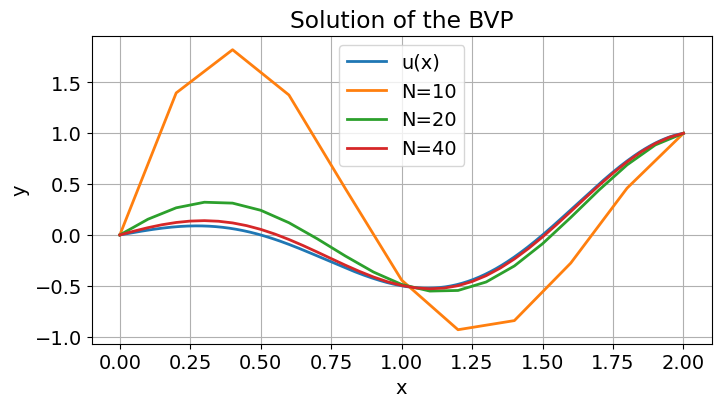

In [22]:
# here we create our specific case
ex1 = BVP(f, g0=u(0.0), g1=u(2.0), a=0.0, b=2.0)

# solve problem and plot ...
plt.plot(x_values := np.linspace(0, 2, 500), u(x_values), label="u(x)")  # type: ignore

for N in (10, 20, 40):
    solution = solve_bvp(ex1, N)
    print(
        f"Error {N=}: {max(abs(elem - u(x_value)) for x_value, elem in zip(*solution))}"
    )
    plt.plot(*solution, label=f"{N=}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of the BVP")
plt.legend()
plt.show()